# Reading the data 

---

Lately, the _.fits_ data was transformed into _.csv_ and saved in database/csv_files. We are going to import a light curve sample and work with it.

In [2]:
import pandas as pd
from datetime import datetime
!pip install control
from tools import *

You should consider upgrading via the 'c:\users\guisa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Loading BokehJS ...

In [3]:
# FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'
FILE_PATH = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'


In [4]:
# https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime


# Reading data
data_sample = pd.read_csv(FILE_PATH)
# data_sample.DATE = pd.to_datetime(data_sample.DATE)

# data.DATE: str -> datetime.datetime
for i in range(data_sample.DATE.size):
    data_sample.DATE[i] = datetime.strptime(data_sample.DATE[i], '%Y-%m-%d %H:%M:%S.%f')


display(data_sample)

time = data_sample.DATE
flux = data_sample.WHITEFLUX

<ipython-input-4-2c25a0a32d87>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample.DATE[i] = datetime.strptime(data_sample.DATE[i], '%Y-%m-%d %H:%M:%S.%f')


DATE  WHITEFLUX
0      2007-05-16 18:10:55.071642  112626.77
1      2007-05-16 18:19:27.113766  112605.61
2      2007-05-16 18:27:59.155929  112771.50
3      2007-05-16 18:36:31.198092  113113.60
4      2007-05-16 18:45:03.240256  112621.79
...                           ...        ...
23946  2007-10-05 19:08:02.358665  112438.61
23947  2007-10-05 19:16:34.313684  112406.01
23948  2007-10-05 19:25:06.268742  112496.13
23949  2007-10-05 19:33:38.223801  112344.83
23950  2007-10-05 19:42:10.178859  112318.50

[23951 rows x 2 columns]

In [5]:
viz.view_lightcurve(time, flux)

In [5]:
# Median sample rate of the time series
sample_rate = time.diff().median()
sample_rate

Timedelta('0 days 00:08:31.994769')

In [6]:
# Sample size
time[time.size-1] - time[0]

datetime.timedelta(days=142, seconds=5475, microseconds=107217)

In [7]:
time[0]

datetime.datetime(2007, 5, 16, 18, 10, 55, 71642)

# Another approach

---



In [8]:
data_sample = pd.read_csv(FILE_PATH)
data_sample.DATE = pd.to_datetime(data_sample.DATE)

date = data_sample.DATE
date[0]

flux = data_sample.WHITEFLUX.to_numpy()

In [9]:
data_sample.head()

DATE  WHITEFLUX
0 2007-05-16 18:10:55.071642  112626.77
1 2007-05-16 18:19:27.113766  112605.61
2 2007-05-16 18:27:59.155929  112771.50
3 2007-05-16 18:36:31.198092  113113.60
4 2007-05-16 18:45:03.240256  112621.79

In [82]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

index = pd.DatetimeIndex(date)
index.name = None


data_sample_two = pd.Series(flux, index=index)
data_sample_two.head()

2007-05-16 18:10:55.071642    112626.77
2007-05-16 18:19:27.113766    112605.61
2007-05-16 18:27:59.155929    112771.50
2007-05-16 18:36:31.198092    113113.60
2007-05-16 18:45:03.240256    112621.79
dtype: float64

In [118]:
data_sample_two['2007-05-19 01:22:07']

2007-05-19 01:22:07.244849    111857.01
dtype: float64

In [123]:
data_sample_two.mean()

112501.16221318526

In [125]:
list = []

for i in data_sample_two:
    if i < data_sample_two.mean():
        list.append(i)
        
        ######## PAREI Aqui

In [115]:
import plotly.express as px

fig = px.line(x=time, y=flux, title='Raw Light Curve')
fig.show()

# ORMaster

Reading time series

In [6]:
df = pd.read_csv(FILE_PATH)
df.head()

DATE  WHITEFLUX
0  2007-05-16 18:10:55.071642  112626.77
1  2007-05-16 18:19:27.113766  112605.61
2  2007-05-16 18:27:59.155929  112771.50
3  2007-05-16 18:36:31.198092  113113.60
4  2007-05-16 18:45:03.240256  112621.79

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23951 entries, 0 to 23950
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       23951 non-null  object 
 1   WHITEFLUX  23951 non-null  float64
dtypes: float64(1), object(1)
memory usage: 374.4+ KB


Column `DATE`: object => datetime64

In [8]:
df.DATE = pd.to_datetime(df.DATE)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23951 entries, 0 to 23950
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       23951 non-null  datetime64[ns]
 1   WHITEFLUX  23951 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 374.4 KB


Setting the column `DATE` as the DataFrame index

In [11]:
df.set_index('DATE', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23951 entries, 2007-05-16 18:10:55.071642 to 2007-10-05 19:42:10.178859
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WHITEFLUX  23951 non-null  float64
dtypes: float64(1)
memory usage: 374.2 KB


## Plotting

<AxesSubplot:xlabel='DATE'>

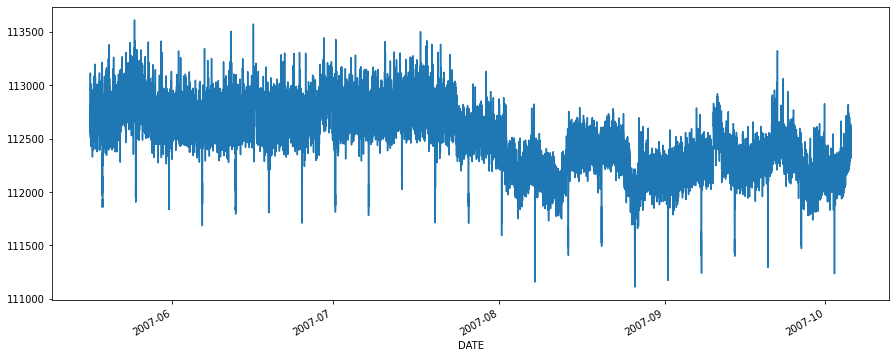

In [16]:
df.WHITEFLUX.plot(figsize=(15, 6))

## Seasonality 

In [75]:
df.index

DatetimeIndex(['2007-05-16 18:10:55.071642', '2007-05-16 18:19:27.113766',
               '2007-05-16 18:27:59.155929', '2007-05-16 18:36:31.198092',
               '2007-05-16 18:45:03.240256', '2007-05-16 18:53:35.282419',
               '2007-05-16 19:02:07.324582', '2007-05-16 19:10:39.366705',
               '2007-05-16 19:19:11.408828', '2007-05-16 19:27:43.450951',
               ...
               '2007-10-05 18:25:22.583936', '2007-10-05 18:33:54.538874',
               '2007-10-05 18:42:26.493771', '2007-10-05 18:50:58.448709',
               '2007-10-05 18:59:30.403687', '2007-10-05 19:08:02.358665',
               '2007-10-05 19:16:34.313684', '2007-10-05 19:25:06.268742',
               '2007-10-05 19:33:38.223801', '2007-10-05 19:42:10.178859'],
              dtype='datetime64[ns]', name='DATE', length=23951, freq=None)

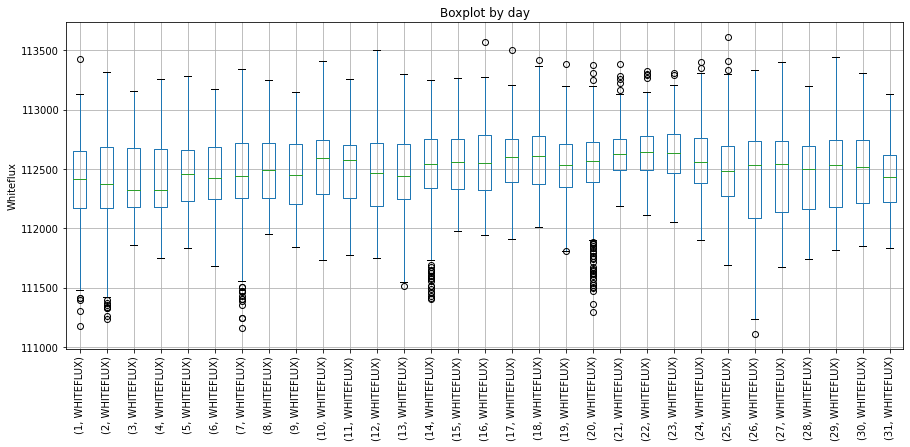

In [183]:
df.groupby(df.index.day).boxplot(subplots=False, figsize=(15, 6), rot=90)
plt.title('Boxplot by day')
plt.ylabel('Whiteflux')
plt.show()

# One eclipse a week 

In [ ]:
# https://www.quora.com/How-do-you-identify-seasonality-in-a-time-series-data

# Phase Folded

In [358]:
from astropy import timeseries

ts = timeseries.TimeSeries.from_pandas(df)
print(type(ts))
ts.pprint()

<class 'astropy.timeseries.sampled.TimeSeries'>
             time             WHITEFLUX 
----------------------------- ----------
2007-05-16T18:10:55.071642000  112626.77
2007-05-16T18:19:27.113766000  112605.61
2007-05-16T18:27:59.155929000   112771.5
2007-05-16T18:36:31.198092000   113113.6
2007-05-16T18:45:03.240256000  112621.79
2007-05-16T18:53:35.282419000  112553.21
2007-05-16T19:02:07.324582000 112811.305
2007-05-16T19:10:39.366705000  112723.12
2007-05-16T19:19:11.408828000 112513.234
2007-05-16T19:27:43.450951000  112761.56
                          ...        ...
2007-10-05T18:16:50.628958000  112545.79
2007-10-05T18:25:22.583936000  112428.29
2007-10-05T18:33:54.538874000  112613.29
2007-10-05T18:42:26.493771000 112415.414
2007-10-05T18:50:58.448709000  112491.53
2007-10-05T18:59:30.403687000  112400.95
2007-10-05T19:08:02.358665000  112438.61
2007-10-05T19:16:34.313684000  112406.01
2007-10-05T19:25:06.268742000  112496.13
2007-10-05T19:33:38.223801000  112344.83
2007-10-0

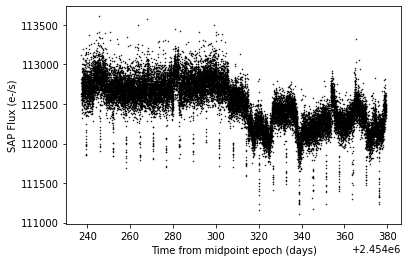

In [356]:
plt.plot(ts.time.jd, ts['WHITEFLUX'], 'k.', markersize=1)
plt.xlabel('Time from midpoint epoch (days)')
plt.ylabel('SAP Flux (e-/s)')
plt.show()

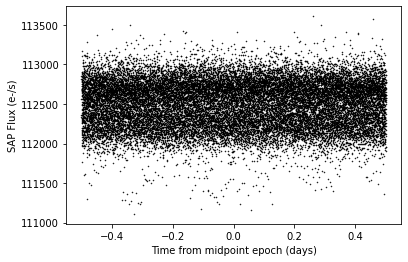

In [354]:
# https://docs.astropy.org/en/stable/timeseries/analysis.html
# https://docs.astropy.org/en/stable/api/astropy.timeseries.TimeSeries.html#astropy.timeseries.TimeSeries.fold
# https://docs.astropy.org/en/stable/units/#module-astropy.units
from astropy import units as u
import matplotlib.pyplot as plt

ts_folded = ts.fold(period = 1 * u.day)
# AJUSTAR O PERIOD
plt.plot(ts_folded.time.jd, ts_folded['WHITEFLUX'], 'k.', markersize=1)
plt.xlabel('Time from midpoint epoch (days)')
plt.ylabel('SAP Flux (e-/s)')
plt.show()